In [21]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from LeNet import LeNet

In [22]:
from torchsummary import summary

model = LeNet()

summary(model, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           156
├─ReLU: 1-2                              [-1, 6, 28, 28]           --
├─AvgPool2d: 1-3                         [-1, 6, 14, 14]           --
├─Conv2d: 1-4                            [-1, 16, 10, 10]          2,416
├─ReLU: 1-5                              [-1, 16, 10, 10]          --
├─AvgPool2d: 1-6                         [-1, 16, 5, 5]            --
├─Conv2d: 1-7                            [-1, 120, 1, 1]           48,120
├─ReLU: 1-8                              [-1, 120, 1, 1]           --
├─Linear: 1-9                            [-1, 84]                  10,164
├─Linear: 1-10                           [-1, 10]                  850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
Total mult-adds (M): 0.42
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           156
├─ReLU: 1-2                              [-1, 6, 28, 28]           --
├─AvgPool2d: 1-3                         [-1, 6, 14, 14]           --
├─Conv2d: 1-4                            [-1, 16, 10, 10]          2,416
├─ReLU: 1-5                              [-1, 16, 10, 10]          --
├─AvgPool2d: 1-6                         [-1, 16, 5, 5]            --
├─Conv2d: 1-7                            [-1, 120, 1, 1]           48,120
├─ReLU: 1-8                              [-1, 120, 1, 1]           --
├─Linear: 1-9                            [-1, 84]                  10,164
├─Linear: 1-10                           [-1, 10]                  850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
Total mult-adds (M): 0.42
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29

In [23]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(32),
    torchvision.transforms.ToTensor()
])

In [24]:
train_dataset = torchvision.datasets.FashionMNIST(root='../datasets/', train=True, transform=transforms, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='../datasets/', train=False, transform=transforms, download=True)

In [29]:
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [31]:
import hiddenlayer as hl
from tqdm import tqdm

history1 = hl.History()
canvas1 = hl.Canvas()
history2 = hl.History()
canvas2 = hl.Canvas()
epochs = 5
test_losses = []
    
for epoch in range(epochs):
    
    for batch_idx, (data, targets) in enumerate(tqdm(train_dl)):
        n_correct = 0
        losses = []
        
        preds = model(data)
        loss = criterion(preds, targets)
        losses.append(loss)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        _, predictions = preds.max(1)
        
        for i in range(32):
            if predictions[i] == targets[i]:
                n_correct+=1
                
        acc = n_correct / 32.0
        
        if batch_idx % 1 == 0:
            history1.log(batch_idx, loss=loss, accuracy=acc)
        
        if batch_idx % 300 == 0:
            history1.progress()
        
        with torch.no_grad():
            model.eval()
            
            test_correct = 0
        
            preds = model(data)
            test_loss = criterion(preds, targets)
            
        
            _, predictions = preds.max(1)
        
            for i in range(32):
                if predictions[i] == targets[i]:
                    test_correct+=1
            
            test_acc = test_correct / 32.0
        
            if batch_idx % 1 == 0:
                history2.log(batch_idx, test_loss=test_loss, test_accuracy=test_acc)
            
            if batch_idx % 300 == 0:
                history2.progress()
                print("\n")
            
            model.train()
                
    test_losses.append(test_loss)
    print(f"\n Epoch: {epoch+1}, Loss: {loss}  Accuracy: {acc}, Test Loss: {test_loss}  Test Accuracy: {test_acc} \n")

  2%|▋                                      | 18/938 [00:00<00:10, 89.06it/s]

Step 0: loss: 2.311502456665039  accuracy: 0.03125  
Step 0: test_loss: 2.3058719635009766  test_accuracy: 0.03125  




 31%|███████████▌                         | 293/938 [00:02<00:06, 100.06it/s]

Step 300: loss: 0.6849316954612732  accuracy: 0.8125  
Step 300: test_loss: 0.6575890183448792  test_accuracy: 0.8125  




 66%|████████████████████████▌            | 622/938 [00:06<00:02, 105.87it/s]

Step 600: loss: 0.5949380993843079  accuracy: 0.78125  
Step 600: test_loss: 0.5797865986824036  test_accuracy: 0.8125  




 98%|████████████████████████████████████▎| 919/938 [00:08<00:00, 103.69it/s]

Step 900: loss: 0.5823363661766052  accuracy: 0.78125  
Step 900: test_loss: 0.5696513056755066  test_accuracy: 0.78125  




100%|█████████████████████████████████████| 938/938 [00:09<00:00, 102.78it/s]



 Epoch: 1, Loss: 0.23854480683803558  Accuracy: 0.96875, Test Loss: 0.22817601263523102  Test Accuracy: 0.96875 



  1%|▍                                     | 11/938 [00:00<00:09, 101.92it/s]

Step 0: loss: 0.40980327129364014  accuracy: 0.78125  
Step 0: test_loss: 0.39945292472839355  test_accuracy: 0.78125  




 34%|████████████▌                        | 318/938 [00:03<00:06, 102.30it/s]

Step 300: loss: 0.4138413071632385  accuracy: 0.78125  
Step 300: test_loss: 0.39589235186576843  test_accuracy: 0.8125  




 65%|████████████████████████▏            | 614/938 [00:06<00:03, 100.70it/s]

Step 600: loss: 0.4985959827899933  accuracy: 0.875  
Step 600: test_loss: 0.4612429738044739  test_accuracy: 0.875  




 97%|███████████████████████████████████▉ | 911/938 [00:08<00:00, 105.14it/s]

Step 900: loss: 0.45049551129341125  accuracy: 0.875  
Step 900: test_loss: 0.4277154505252838  test_accuracy: 0.875  




100%|█████████████████████████████████████| 938/938 [00:09<00:00, 102.13it/s]



 Epoch: 2, Loss: 0.35998326539993286  Accuracy: 0.875, Test Loss: 0.3481438457965851  Test Accuracy: 0.875 



  1%|▍                                     | 11/938 [00:00<00:09, 102.31it/s]

Step 0: loss: 0.39908644556999207  accuracy: 0.84375  
Step 0: test_loss: 0.38365161418914795  test_accuracy: 0.84375  




 33%|████████████▏                        | 310/938 [00:03<00:06, 101.91it/s]

Step 300: loss: 0.35874488949775696  accuracy: 0.875  
Step 300: test_loss: 0.350726455450058  test_accuracy: 0.875  




 65%|████████████████████████▏            | 612/938 [00:06<00:03, 103.73it/s]

Step 600: loss: 0.4109227955341339  accuracy: 0.8125  
Step 600: test_loss: 0.3640158772468567  test_accuracy: 0.78125  




 98%|████████████████████████████████████▎| 920/938 [00:09<00:00, 104.18it/s]

Step 900: loss: 0.5737086534500122  accuracy: 0.78125  
Step 900: test_loss: 0.5492308735847473  test_accuracy: 0.8125  




100%|█████████████████████████████████████| 938/938 [00:09<00:00, 100.68it/s]



 Epoch: 3, Loss: 0.34609144926071167  Accuracy: 0.90625, Test Loss: 0.27030423283576965  Test Accuracy: 0.9375 



  1%|▍                                     | 11/938 [00:00<00:09, 102.84it/s]

Step 0: loss: 0.3874833583831787  accuracy: 0.875  
Step 0: test_loss: 0.38300055265426636  test_accuracy: 0.875  




 34%|████████████▌                        | 319/938 [00:03<00:05, 104.21it/s]

Step 300: loss: 0.27033552527427673  accuracy: 0.84375  
Step 300: test_loss: 0.2559601068496704  test_accuracy: 0.875  




 66%|████████████████████████▎            | 616/938 [00:05<00:03, 103.66it/s]

Step 600: loss: 0.17953503131866455  accuracy: 0.9375  
Step 600: test_loss: 0.17804215848445892  test_accuracy: 0.9375  




 97%|████████████████████████████████████ | 913/938 [00:08<00:00, 102.83it/s]

Step 900: loss: 0.2988826036453247  accuracy: 0.78125  
Step 900: test_loss: 0.2932609021663666  test_accuracy: 0.78125  




100%|█████████████████████████████████████| 938/938 [00:09<00:00, 103.30it/s]



 Epoch: 4, Loss: 0.24002882838249207  Accuracy: 0.9375, Test Loss: 0.22988271713256836  Test Accuracy: 0.9375 



  1%|▍                                     | 11/938 [00:00<00:09, 101.94it/s]

Step 0: loss: 0.5282745957374573  accuracy: 0.8125  
Step 0: test_loss: 0.511986255645752  test_accuracy: 0.84375  




 34%|████████████▉                         | 319/938 [00:03<00:06, 98.15it/s]

Step 300: loss: 0.3058271110057831  accuracy: 0.90625  
Step 300: test_loss: 0.29258787631988525  test_accuracy: 0.90625  




 66%|████████████████████████▎            | 616/938 [00:05<00:03, 104.11it/s]

Step 600: loss: 0.3282819986343384  accuracy: 0.84375  
Step 600: test_loss: 0.3134606182575226  test_accuracy: 0.875  




 97%|████████████████████████████████████ | 913/938 [00:08<00:00, 103.04it/s]

Step 900: loss: 0.37257906794548035  accuracy: 0.84375  
Step 900: test_loss: 0.34511417150497437  test_accuracy: 0.875  




100%|█████████████████████████████████████| 938/938 [00:09<00:00, 102.70it/s]


 Epoch: 5, Loss: 0.23165152966976166  Accuracy: 0.90625, Test Loss: 0.21310432255268097  Test Accuracy: 0.90625 



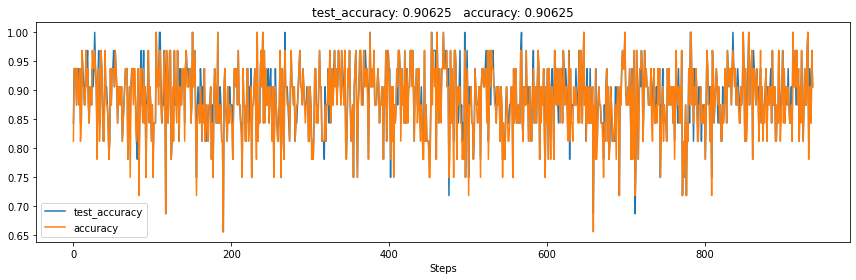

In [32]:
canvas1.draw_plot([history2["test_accuracy"], history1["accuracy"]])

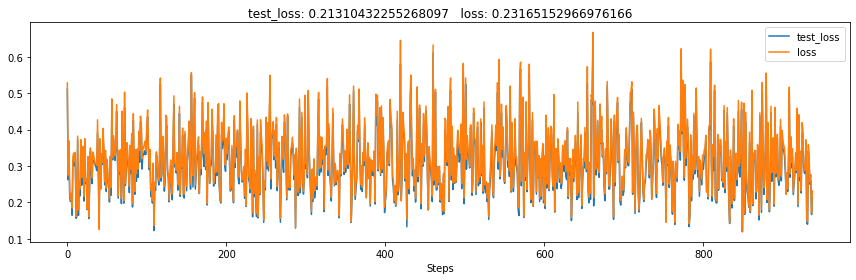

In [33]:
canvas2.draw_plot([history2["test_loss"], history1["loss"]])